This is the section to show 2020 year-to-date market performance across countries in Americas, Europe, Asia and Africa. 
The world is going to enter deep economic recession due to Coronavirus pandemic.


In [1]:
import os
import pandas as pd
import datetime
import pandas_datareader.data as web
import hvplot.pandas
from pandas import Series, DataFrame
from pathlib import Path
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv


In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

px.set_mapbox_access_token(mapbox_token)
type(mapbox_token)

str

In [3]:
# Download Country ETF data from Yahoo

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 5, 12)

us_df = web.DataReader("SPY", 'yahoo', start, end)
bra_df = web.DataReader("EWZ", 'yahoo', start, end)
mex_df = web.DataReader("EWW", 'yahoo', start, end)
can_df = web.DataReader("EWC", 'yahoo', start, end)
clp_df = web.DataReader("ECH", 'yahoo', start, end)
chf_df = web.DataReader("EWL", 'yahoo', start, end)
ger_df = web.DataReader("EWG", 'yahoo', start, end)
uk_df = web.DataReader("EWU", 'yahoo', start, end)
ita_df = web.DataReader("EWI", 'yahoo', start, end)
fra_df = web.DataReader("EWQ", 'yahoo', start, end)
jpn_df = web.DataReader("EWJ", 'yahoo', start, end)
chi_df = web.DataReader("GXC", 'yahoo', start, end)
sk_df = web.DataReader("EWY", 'yahoo', start, end)
aus_df = web.DataReader("EWA", 'yahoo', start, end)
ind_df = web.DataReader("PIN", 'yahoo', start, end)
try_df = web.DataReader("TUR", 'yahoo', start, end)
sar_df = web.DataReader("KSA", 'yahoo', start, end)
zar_df = web.DataReader("EZA", 'yahoo', start, end)
egy_df = web.DataReader("EGPT", 'yahoo', start, end)
ils_df = web.DataReader("EIS", 'yahoo', start, end)
nge_df = web.DataReader("NGE", 'yahoo', start, end)
rus_df = web.DataReader("ERUS", 'yahoo', start, end)

In [4]:
#Concatenate, Clean and Rename columns in Dataframes

concat_port = pd.concat([us_df,bra_df,mex_df,can_df,clp_df,chf_df,ger_df,uk_df,ita_df,fra_df,jpn_df,chi_df,sk_df,us_df,ind_df,try_df,sar_df,zar_df,egy_df,ils_df,nge_df,rus_df], axis="columns", join="outer")
concat_port.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume'], inplace=True)
concat_port.columns = ["United States","Brazil","Mexico","Canada","Chile","Switzerland","Germany","United Kingdom","Italy","France","Japan","China","South Korea","Australia","India","Turkey","Saudi Arabia","South Africa","Egypt","Israel","Nigeria","Russia"]

In [12]:
# Calculate daily returns, cummulative returns and YTD returns

returns=concat_port.pct_change()
cumm_returns= (1+returns.fillna(0)).cumprod()
ytd_returns = (cumm_returns-1)*100
country_ytd = ytd_returns.tail(1).T
country_ytd.columns = ["YTD % Performance"]
country_ytd.index.name='Country'
country_ytd

,YTD % Performance
Country,
United States,-11.239657
Brazil,-54.327617
Mexico,-35.408560
Canada,-19.446298
Chile,-28.914954
Switzerland,-9.619137
Germany,-22.824631
United Kingdom,-27.203515
Italy,-31.036786


In [15]:
#Box Plot by Country to show daily returns distributions and outliers

returns.hvplot.box(label='2020 Daily Returns Box Plot by Country', xlabel='Country', ylabel='Returns in %',width=1000,height=600).opts(xrotation=45)

:BoxWhisker   [Variable]   (value)

In [16]:
# Scatter Plot by Country and Dates to show the spike in volatilities within March 2020

returns.hvplot.scatter(label='2020 Daily Returns Scatter Plot by Country', xlabel='Date', ylabel='Returns in %',width=1000,height=600)

:NdOverlay   [Variable]
   :Scatter   [Date]   (value)

In [19]:
# Rolling YTD returns by Country in 2020

ytd_returns.hvplot.line(label='2020 Year-to-Date Stock Market Performance by Country', xlabel='Date', ylabel='Performance in %',width=1000,height=600)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [26]:
# Read the Country mapping files

file_path = Path("country.csv")
df_country_locations = pd.read_csv(file_path)

In [13]:
# Merge and Concatenate the dataframes

merged_df = pd.merge(country_ytd,df_country_locations,on='Country' , how='outer').dropna()
abs_returns = merged_df['YTD % Performance'].abs()
concat_df = pd.concat([merged_df,abs_returns],axis=1)
concat_df.columns = ["Country","YTD % Performance", "Symbol","Latitude","Longitude","Absolute YTD % Performance"]
concat_df

,Country,YTD % Performance,Symbol,Latitude,Longitude,Absolute YTD % Performance
0,United States,-11.239657,US,37.090240,-95.712891,11.239657
1,Brazil,-54.327617,BR,-14.235004,-51.925280,54.327617
2,Mexico,-35.408560,MX,23.634501,-102.552784,35.408560
3,Canada,-19.446298,CA,56.130366,-106.346771,19.446298
4,Chile,-28.914954,CL,-35.675147,-71.542969,28.914954
5,Switzerland,-9.619137,CH,46.818188,8.227512,9.619137
6,Germany,-22.824631,DE,51.165691,10.451526,22.824631
7,United Kingdom,-27.203515,GB,55.378051,-3.435973,27.203515
8,Italy,-31.036786,IT,41.871940,12.567380,31.036786
9,France,-27.929567,FR,46.227638,2.213749,27.929567


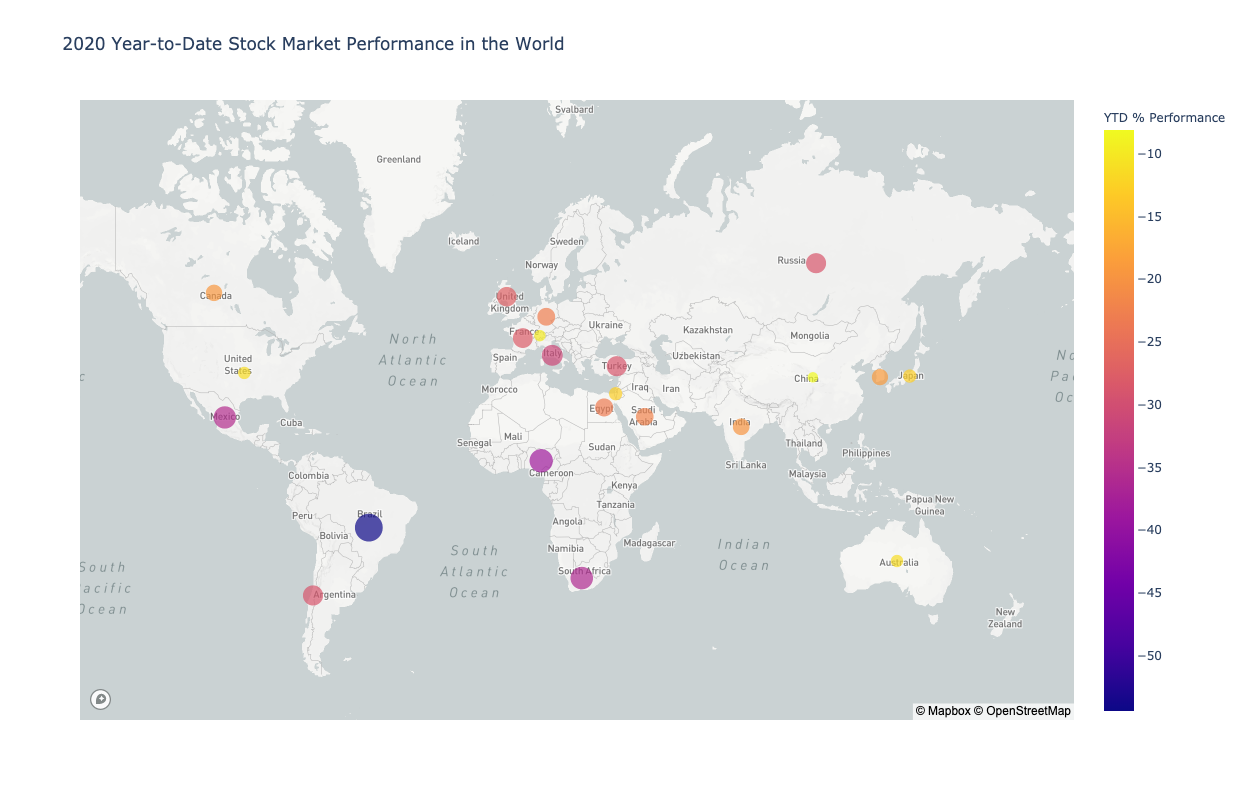

In [23]:
# plot the stock returns on the worldwide map and reflect the size of losses by country

px.scatter_mapbox(concat_df, lat="Latitude", lon="Longitude",zoom=1,hover_data=["YTD % Performance","Country"],color="YTD % Performance", size ="Absolute YTD % Performance",
            width=1200,height=800,title="2020 Year-to-Date Stock Market Performance in the World")